In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from collections import Counter, defaultdict, deque
import os, sys, glob, copy, json, time, pickle
from pathlib import Path
from argparse import Namespace
from IPython.display import display, Audio

In [35]:
with open("./data/snapshot.txt", encoding="utf_8_sig") as f:
    data = json.load(f)

In [36]:
data.keys()

dict_keys(['bpmCandidates', 'onSignal', 'onSignalSamplingRate', 'waveFinishedAt', 'onPowerSpect', 'wave', 'bpm', 'peakOffset', 'beatReferenceTime', 'waveSampleRate', 'stfts'])

In [37]:
np.array(data["wave"]).shape

(55125,)

In [38]:
waveSamplingRate = 44100//4

In [39]:
Audio(np.array(data["wave"]), rate=waveSamplingRate)

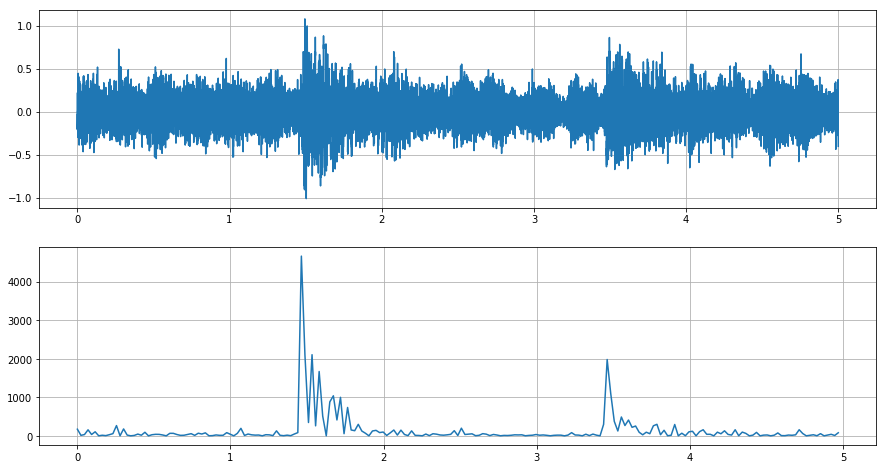

In [40]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(np.arange(len(data["wave"])) / waveSamplingRate, data["wave"])
plt.grid()
plt.subplot(212)
plt.plot(np.arange(len(data["onSignal"])) / data["onSignalSamplingRate"], data["onSignal"])
plt.grid()
plt.show()

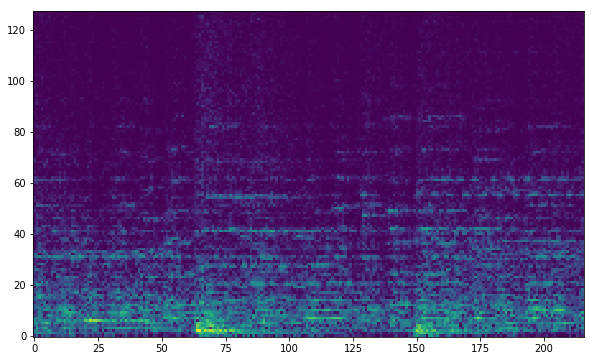

In [52]:
stfts = np.array(data["stfts"])
plt.figure(figsize=(15,6))
plt.imshow(np.log1p(stfts).T[:128], origin="lower")
plt.show()

In [46]:
np.array(data["onSignal"]).shape

(215,)

In [47]:
stfts.shape

(216, 256)